* **Student**: Minhchau Dang
* **Email Address**: minhchau.dang@berkeley.edu
* **Course**: 2016-0111 DATASCI W261: Machine Learning at Scale
* **Section**: Spring 2016, Section 2
* **Assignment**: Homework 0, Week 0
* **Submission Date**: Month 0, 2016

This notebook requires some nbextensions.

* [toc2](https://github.com/ipython-contrib/IPython-notebook-extensions/tree/master/nbextensions/usability/toc2) provides a button to create a floating table of contents
* [toggle_all_line_numbers](https://github.com/ipython-contrib/IPython-notebook-extensions/tree/master/nbextensions/usability/toggle_all_line_numbers) provides a button to see line numbers for all code cells
* [autosaveclasses](https://github.com/holatuwol/jupyter-magic/tree/master/nbextensions/autosaveclasses.js) avoids usage of `%%writefile` (cells with a class definition are saved to disk when run)

If they are not yet installed, run the following cell and restart the notebook server.

In [ ]:
%%bash
IPYTHON_PROFILE_HOME=$(ipython locate)

nbextdl() {
    if [ ! -f $IPYTHON_PROFILE_HOME/nbextensions/$2/$3 ]; then
        mkdir -p $IPYTHON_PROFILE_HOME/nbextensions/$2
        curl --silent -L \
            "https://raw.githubusercontent.com/$1/master/nbextensions/$2/$3" \
            > "$IPYTHON_PROFILE_HOME/nbextensions/$2/$3"
    fi
}

nbextdl ipython-contrib/IPython-notebook-extensions usability/toc2 main.js
nbextdl ipython-contrib/IPython-notebook-extensions usability/toc2 main.css
nbextdl ipython-contrib/IPython-notebook-extensions usability/toc2 icon.png
nbextdl ipython-contrib/IPython-notebook-extensions usability/toc2 image.png

nbextdl ipython-contrib/IPython-notebook-extensions usability/toggle_all_line_numbers main.js
nbextdl ipython-contrib/IPython-notebook-extensions usability/toggle_all_line_numbers icon.png

nbextdl holatuwol/jupyter-magic . autosaveclasses.js

Autoload the extensions.

In [ ]:
%%javascript
require(['base/js/utils'], function(utils) {
    utils.load_extensions('usability/toc2/main');
    utils.load_extensions('usability/toggle_all_line_numbers/main');
    utils.load_extensions('autosaveclasses');
});

<IPython.core.display.Javascript object>

# HW 6.0

> In mathematics, computer science, economics, or management science what is mathematical optimization?

Mathematical optimization is the process of selecting the "best" value for a set of *decision variables* with respect to the value of some *objective function*.

In our case, we are maximizing or minimizing an objective function, such as minimizing the mean squared error to find the best parameters for linear regression.

> Give an example of a optimization problem that you have worked with directly or that your organization has worked on. Please describe the objective function and the decision variables.

At a previous job, an optimization project that we worked on was to find the best way to word promotional banners on an e-commerce website. The objective "function" was how much revenue the promotion drove, and the decision variable was the wording of the headline on the promo banner.

> Was the project successful (deployed in the real world)? Describe.

In this case, the project was not 100% successful, as A/B testing can be difficult to get statistically significant results.  If we had unlimited time to run the A/B test, we may have been able to iterate on the wording of the promotion for optimization.

# HW 6.1 Optimization Theory

## Unconstrained univariate optimization

Let $f : \mathbb{R} \rightarrow \mathbb{R}$ in class $C^1$ and $C^2$ (its first derivative and second derivative are continuous functions). Let $\nabla f : \mathbb{R} \rightarrow \mathbb{R}$ be the gradient function (first derivative) and let $\nabla^2 f : \mathbb{R} \rightarrow \mathbb{R}$ be the gradient of the gradient function (second derivative).

If there is a value $x_0$ for the decision variable satisfying the condition that there exists a neighborhood $\mathcal{N}$ consisting of the points within $\epsilon > 0$ of $x_0$ for which $\forall x \in \mathcal{N}: f(x_0) < f(x)$, then we define that as a *local minimum* of $f$. If there is a value $x_0$ for the decision variable satisfying the condition that there exists a neighborhood $\mathcal{N}$ consisting of the points within $\epsilon > 0$ of $x_0$ for which $\forall x \in \mathcal{N}: f(x_0) > f(x)$, then we define that as a *local maximum* of $f$.

Define a local extrema as a point that is either a local minimum or a local maximum.

> For unconstrained univariate optimization what are the first order Necessary Conditions for Optimality (FOC)? Give a mathematical definition.

Let $x_0$ be a local extrema. $x_0$ occurs when the first derivative of $f$ evaluated at $x_0$ is zero ($\nabla f(x_0) = 0$).

>  What are the second order optimality conditions (SOC)? Give a mathematical defintion.

Let $x_0$ be a local extrema. $x_0$ is a local minimum if the second derivative of $f$ evaluated at $x_0$ is positive ($\nabla^2 f(x_0) > 0$), and a local maximum of $f$ if the second derivative at $f$ evaluated at $x_0$ is negative ($\nabla^2 f(x_0) < 0$).

> Also in python, plot the univariate function $x^3 -12x^2-6$ defined over the real domain -6 to +6. Also plot its corresponding first and second derivative functions. Eyeballing these graphs, identify candidate optimal points and then classify them as local minimums or maximums. Highlight and label these points in your graphs.

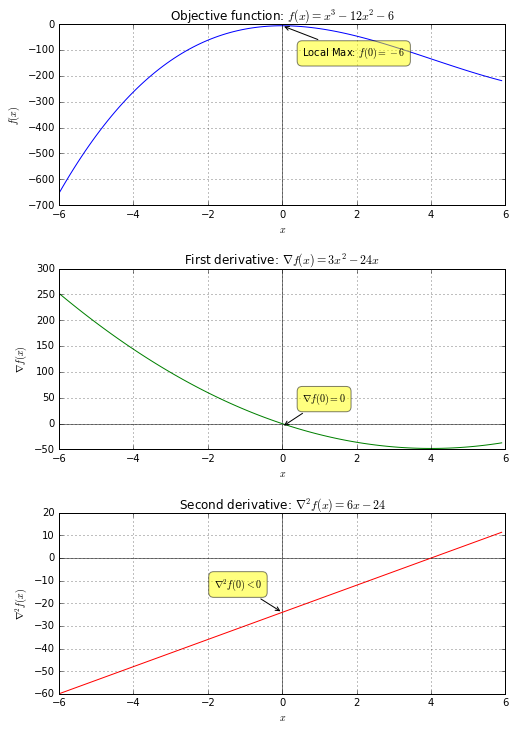

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def plot_61():
    x = np.arange(-6, 6, 0.1)
    y = x ** 3 - 12 * x ** 2 - 6
    y_prime = 3 * x ** 2 - 24 * x
    y_2prime = 6 * x - 24

    plt.figure(figsize=(8,12))
    plt.subplots_adjust(hspace=0.35)

    plt.axhline(y=0, color='k')

    # Plot the objective function

    plt.subplot(3, 1, 1)
    plt.grid(True)
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.plot(x, y)
    plt.ylabel(r"$f(x)$")
    plt.xlabel(r"$x$")
    plt.title(r"Objective function: $f(x)=x^3-12x^2-6$")
    plt.annotate(r'Local Max: $f(0)=-6$',
        xy = (0, -6), xytext = (20, -20),
        textcoords = 'offset points', ha = 'left', va = 'top',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

    # Plot the first derivative function

    plt.subplot(3, 1, 2)
    plt.grid(True)
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.plot(x, y_prime, color='green')
    plt.ylabel(r"$\nabla f(x)$")
    plt.xlabel(r"$x$")
    plt.title(r"First derivative: $\nabla f(x)=3x^2-24x$")
    plt.annotate(r'$\nabla f(0)=0$',
        xy = (0, -6), xytext = (20, 20),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

    # Plot the second derivative

    plt.subplot(3, 1, 3)
    plt.grid(True)
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.plot(x, y_2prime, color='red')
    plt.ylabel(r"$\nabla^2 f(x)$")
    plt.xlabel(r"$x$")
    plt.title(r"Second derivative: $\nabla^2 f(x)=6x-24$")
    plt.annotate(r'$\nabla^2 f(0)<0$',
        xy = (0, -24), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plot_61()

> Justify your responses using the FOC and SOC.

The objective function evaluated at 0 $f(0) = -6$ is a local maximum of $f(x)$, as indicated by the first derivative evaluated at 0 $\nabla f(0) = 0$ (satisfying the first order condition), the second drivative evaluated at 0 $\nabla^2 f(x) < 0$ (satisfying the second order condition).

## Unconstrained multivariate optimization

Let $f : \mathbb{R}^n \rightarrow \mathbb{R}$ in class $C^1$ and $C^2$ (its first derivative and second derivative are continuous functions). Let $\nabla f : \mathbb{R}^n \rightarrow \mathbb{R}^n$ be the gradient function (first derivative) and let $\nabla^2 f : \mathbb{R}^n \rightarrow \mathbb{R}^{n \times n}$ be the gradient of the gradient function (second derivative).

> For unconstrained multi-variate optimization what are the first order Necessary Conditions for Optimality (FOC). Give a mathematical definition.

Let $\mathbf{x}_0$ be a local extrema. $\mathbf{x}_0$ occurs when the first derivative (Jacobian matrix) has all entries equal to zero, or $J(\mathbf{x}_0) = \mathbf{0}$.

> What are the second order optimality conditions (SOC)? > What is the Hessian matrix in this context? Give a mathematical definition. 

Let $\mathbf{x}_0$ be a local extrema. $\mathbf{x}_0$ is a local minimum if the second derivative (Hessian matrix) evaluated at that point has all entries non-negative (i.e., $H(\mathbf{x})$ is positive semidefinite), and a local maximum if the second derivative evaluated at that point has all entries non-positive (i.e., $H(\mathbf{x}$) is negative semidefinite).

# HW 6.2

> Taking $x=1$ as the first approximation ($x_1$) of a root of $x^3 + 2x -4 = 0$, use the Newton-Raphson method to calculate the second approximation (denoted as $x_2$) of this root. (Hint: the solution is $x_2 = 1.2$)

## Visual intuition

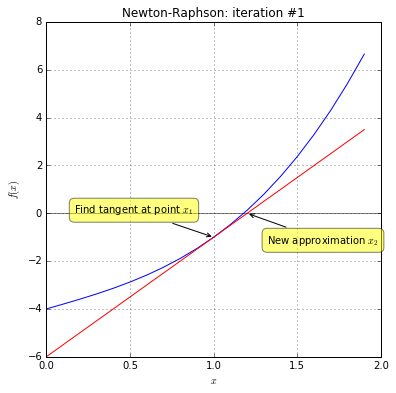

In [ ]:
%matplotlib inline

def plot_62():
    x = np.arange(0, 2, 0.1)
    y = x ** 3 + 2 * x - 4
    tangent = 5 * x - 6

    plt.figure(figsize=(6,6))

    plt.grid(True)
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.plot(x, y)
    plt.plot(x, tangent, color="red")
    plt.ylabel(r"$f(x)$")
    plt.xlabel(r"$x$")
    plt.title(r"Newton-Raphson: iteration #1")
    plt.annotate(r'Find tangent at point $x_1$',
        xy = (1,-1), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    plt.annotate(r'New approximation $x_2$',
        xy = (1.2,0), xytext = (20, -20),
        textcoords = 'offset points', ha = 'left', va = 'top',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plot_62()

## Computation process

Find value of $f(x)$ at $x_1$
$$
\begin{equation}
\begin{split}
f(x) & = x^3+2x-4 \\
f(1) & = (1)^3+2(1)-4 \\
f(1) & = -1 \\
\end{split}
\end{equation}
$$

Find value of $\nabla f(x)$ at $x_{1}$:
$$
\begin{equation}
\begin{split}
\nabla f(x) & = 3x^2+2 \\
\nabla f(1) & = 3(1)^2+2 \\
\nabla f(1) & = 5 \\
\end{split}
\end{equation}
$$

Define line with $m = \nabla f(x_1)$ containing point $(x_1, f(x_1))$:
$$
\begin{equation}
\begin{split}
f(x)-f(x_1) & = (\nabla f(x_1))(x-x_1) \\
f(x)-(-1) & = (5)(x-(1)) \\
f(x)+1 & = 5(x-1) \\
f(x) & = 5x - 6
\end{split}
\end{equation}
$$

Find $x_2$ when $f(x_2) = 0$, which is the $x$-intercept of that line:
$$
\begin{equation}
\begin{split}
f(x_2) &= 5x_2 - 6 \\
(0) &= 5x_2 - 6 \\
5x_2 &= 6 \\
x_2 &= 1.2
\end{split}
\end{equation}
$$

## Computation shortcut

To cross-check our answer, if we start with the assumption that we are always going to find the $x$-intercept, we can derive a simplified version of the Newton-Raphson approach:

\begin{equation}
\begin{split}
f(x_2)-f(x_1) & = (\nabla f(x_1))(x_2-x_1) \\
(0)-f(x_1) & = (\nabla f(x_1))(x_2-x_1) \\
-f(x_1) & = (\nabla f(x_1))(x_2-x_1) \\
-\frac{f(x_1)}{\nabla f(x_1)} & = x_2-x_1 \\
x_2 & = x_1 - \frac{f(x_1)}{\nabla f(x_1)} \\
\end{split}
\end{equation}

Since we know $x_1 = 1$ and we've already computed $f(x_1) = -1$ and $\nabla f(x_1) = 5$:

\begin{equation}
\begin{split}
x_2 & = x_1 - \frac{f(x_1)}{\nabla f(x_1)} \\
x_2 & = (1) - \frac{(-1)}{(5)} \\
x_2 & = 1.2 \\
\end{split}
\end{equation}


# HW 6.3 Convex Optimization

> What makes an optimization problem convex?

An optimization problem is convex if the objective function we are minimizing is convex. In two dimensions, we can think of a convex function as follows:

- If we look at the function and a tangent line at a specific point, the function globally lies above the tangent line
- If this is true for all points, the function is globally convex

>  What are the first order Necessary Conditions for Optimality in convex optimization.

Let $\mathbf{x}_0$ be a global extrema. Just like in the general case of mathematical optimization, $\mathbf{x}_0$ occurs when the first derivative (Jacobian matrix) has all entries equal to zero, or $J(\mathbf{x}_0) = \mathbf{0}$.

> What are the second order optimality conditions for convex optimization?

In a convex function, the second derivative (Hessian matrix) evaluated at any point has all entries non-negative (i.e., $H(\mathbf{x})$ is positive semidefinite). Therefore, once we identify an extrema $\mathbf{x}_0$ from the first order condition, we know that $\mathbf{x}_0$ is a minimum.

> Are both necessary to determine the maximum or minimum of candidate optimal solutions?

If the objective function is convex, we only need the first order condition to know that an optimal solution is a minimum.

If the objective function is concave, the second derivative (Hessian matrix) evaluated at any point has all entries non-positive (i.e., $H(\mathbf{x})$ is negative semidefinite). In this case, once we identify an extrema $\mathbf{x}_0$ from the first order condition, we know that $\mathbf{x}_0$ is a global maximum.

> Fill in the BLANKS here: Convex minimization, a subfield of optimization, studies the problem of minimizing BLANK functions over BLANK sets. The BLANK property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.

All the BLANKS are filled in with **convex** (or some variant of that word). This results in the following quote from the Wikipedia article on convex optimization ([reference](https://en.wikipedia.org/wiki/Convex_optimization)):

Convex minimization, a subfield of optimization, studies the problem of minimizing **convex** functions over **convex** sets. The **convexity** property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.

# HW 6.4

> The learning objective function for weighted ordinary least squares (WOLS) (aka weight linear regression) is defined as follows:

> $$0.5 \sum_{i} (weight)_i \cdot (\mathbf{W} \cdot \mathbf{X}_i - y_i)^2$$

> Where training set consists of input variables $\mathbf{X}$ (in vector form) and a target variable $y$, and $\mathbf{X}$ is the vector of coefficients for the linear regression model.

> Derive the gradient for this weighted OLS by hand; showing each step and also explaining each step.

## WOLS closed form solution

To simplify our notation, let $\mathbf{\beta}$ be the vector of weight values, with elements $(weight)_i$. We are given matrices of the following dimensions, when we have N observations with M variables:

$$
\mathbf{Y}=\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{bmatrix}
, \mathbf{X}=\begin{bmatrix}
x_{11} & x_{12} & \ldots & x_{1M} \\
x_{21} & x_{22} & \ldots & x_{2M} \\
\vdots & \vdots & \ddots & \vdots \\
x_{N1} & x_{N2} & \ldots & x_{NM}
\end{bmatrix}
, \mathbf{W}=\begin{bmatrix}
W_1 \\
W_2 \\
\vdots \\
W_M
\end{bmatrix}
, \boldsymbol{\beta}=\begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_N
\end{bmatrix}
$$

We want to minimize the learning objective function:
$$
\begin{equation}
\begin{split}
\mathbf{W^*} &= \underset{x}{\text{min}} \bigg(\frac{1}{2} \sum_i \beta_i (\mathbf{X_i} \mathbf{W} - \mathbf{Y_i})^2\bigg) \\
&= \underset{\mathbf{W}}{\text{min}} \bigg(\frac{1}{2} \sum_i \beta_i (\mathbf{X_i} \mathbf{W} - \mathbf{Y_i})^T (\mathbf{X_i} \mathbf{W} - \mathbf{Y_i})\bigg) \\
&= \underset{\mathbf{W}}{\text{min}} \bigg(\frac{1}{2} \sum_i \beta_i (\mathbf{W}^T \mathbf{X_i}^T - \mathbf{Y_i}^T)  (\mathbf{X_i} \mathbf{W} - \mathbf{Y_i})\bigg) \\
&= \underset{\mathbf{W}}{\text{min}} \bigg(\frac{1}{2} \sum_i \beta_i (\mathbf{W}^T\mathbf{X_i}^T\mathbf{X_i}\mathbf{W} - \mathbf{W}^T\mathbf{X_i}^T\mathbf{Y_i} - \mathbf{Y_i}^T\mathbf{X_i}\mathbf{W} + \mathbf{Y_i}^T\mathbf{Y_i})\bigg)
\end{split}
\end{equation}
$$

To find the minimum, we differentiate with respect to $\mathbf{W}$ to get the gradient:

$$
\begin{equation}
\begin{split}
\nabla &= \frac{1}{2} \sum_i \beta_i \bigg(2\mathbf{X_i}^T\mathbf{X_i}\mathbf{W} - 2 \mathbf{X_i}^T\mathbf{Y_i} \bigg) \\
&= \sum_i \beta_i \bigg(\mathbf{X_i}^T\mathbf{X_i}\mathbf{W} - \mathbf{X_i}^T\mathbf{Y_i} \bigg) \\
&= \sum_i \beta_i \mathbf{X_i}^T \bigg(\mathbf{X_i}\mathbf{W} - \mathbf{Y_i} \bigg)
\end{split}
\end{equation}
$$

## WOLS EM gradient function

We can use the same approach as documented in the class notes for CS 229 at Stanford University ([reference](http://cs229.stanford.edu/notes/cs229-notes1.pdf)), which computes each element of the gradient vector separately.

First, if we take the partial derivative with respect to the $j$-th element of the cost vector and apply the chain rule, we have the following:

$$0.5 \sum_{i} (weight)_i \cdot ((2) (\mathbf{W} \cdot \mathbf{X}_i - y_i)) \cdot
    \frac{\partial}{\partial \mathbf{W}_j} (\mathbf{W} \cdot \mathbf{X}_i - y_i)$$

Simplifying by multiplying the (0.5) and the (2), we have the following:

$$\sum_{i} (weight)_i \cdot (\mathbf{W} \cdot \mathbf{X}_i - y_i) \cdot
    \frac{\partial}{\partial \mathbf{W}_j} (\mathbf{W} \cdot \mathbf{X}_i - y_i)$$

Observe that when we take the partial derivative of $\mathbf{W} \cdot \mathbf{X}_i - y_i)$ with respect to $\mathbf{W}_j$, most of the weights in $\mathbf{W}$ are zero. This results in us only being left with $\mathbf{X}_{ij}$, or the $j$-th element of $\mathbf{X}$ (or simply 1 for the intercept term).

This simplifies to the following:

$$\sum_{i} (weight)_i \cdot (\mathbf{W} \cdot \mathbf{X}_i - y_i) \cdot \mathbf{X}_{ij}$$

# HW 6.5

## Generate HW6.5 data

> Generate one million datapoints just like in the following notebook:

> http://nbviewer.ipython.org/urls/dl.dropbox.com/s/kritdm3mo1daolj/MrJobLinearRegressionGD.ipynb

> Weight each example as follows: $\text{weight}(x)= \big|\frac{1}{x}\big|$

1000000 LinearRegression.csv


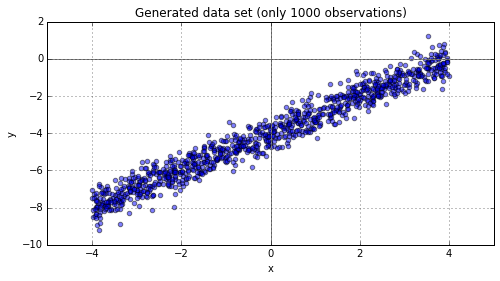

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Create LinearRegression.csv

size = 1000000
x = np.random.uniform(-4, 4, size)
y = x * 1.0 - 4 + np.random.normal(0, 0.5, size)
weight = abs(1/x)
data = zip(y, x, weight)
np.savetxt('LinearRegression.csv', data, delimiter = ",")

# Confirm that we created a file of the right size

!wc -l LinearRegression.csv

# Plot the first 1000 points

def plot_points():
    plt.figure(figsize=(8,4))
    plt.grid(True)
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.scatter(x[:1000], y[:1000], marker='o', alpha=0.5)
    plt.title('Generated data set (only 1000 observations)')
    plt.xlabel('x')
    plt.ylabel('y')

plot_points()

## Create HW6.5 job

> Write a MapReduce job in MRJob to do the training at scale of a weighted OLS model using gradient descent.

In [ ]:
import csv
import sys

from mrjob.job import MRJob
from mrjob.protocol import RawProtocol

class WeightedOrdinaryLeastSquaresJob(MRJob):

    """
    Load the learning factor.
    """
    def configure_options(self):
        super(WeightedOrdinaryLeastSquaresJob, self).configure_options()

        self.add_passthrough_option(
            '--learning-factor', type = 'float', default = 0.001)

    """
    Load the regression model from the previous iteration and initialize the
    partial sums.
    """
    def mapper_init(self):
        self.load_model()
        self.gradient = [0.0] * len(self.coef)

    """
    Compute the error term and use the weighted error value to update the tally.
    """
    def mapper(self, _, line):
        row = csv.reader([line]).next()

        # First element is y, all middle elements are part of the vector x_i,
        # and the last element is the weight.

        y = float(row[0])
        x_i = [1.0] + [float(x) for x in row[1:-1]]
        weight = float(row[-1])

        # Compute the value predicted by the model by computing the dot product.
        # For now, avoid using numpy due to MRJob import issues.

        dot_product = sum([coef_j * x_ij for coef_j, x_ij in zip(self.coef, x_i)])
        error = dot_product - y

        # Update the gradient tally.

        for j in range(len(self.gradient)):
            self.gradient[j] += weight * error * x_i[j]

    """
    Yield the computed tally.
    """
    def mapper_final(self):
        for j in range(len(self.gradient)):
            yield j, self.gradient[j]

    """
    Load the regression model from the previous iteration.
    """
    def reducer_init(self):
        self.load_model()

    """
    Yield the new coefficients by subtracting the gradient change from the
    original coefficient.
    """
    def reducer(self, j, gradients):
        total_gradient = sum(gradients)
        adjusted_gradient = self.options.learning_factor * total_gradient

        new_coef = self.coef[j] - adjusted_gradient
        yield j, new_coef

    """
    Load the regression model from the previous iteration.
    """
    def load_model(self):

        # The model is not guaranteed to be in order since it can be emitted
        # by multiple reducers, so pad the array if we get an index that is
        # too far into the array.

        self.coef = []

        with open('wols_model.txt', 'r') as model_file:
            for key, value in csv.reader(model_file):
                index = int(key)

                for i in range(len(self.coef), index + 1):
                    self.coef.append(0.0)

                self.coef[index] = float(value)

if __name__ == '__main__' and sys.argv[0].find('ipykernel') == -1:
    WeightedOrdinaryLeastSquaresJob().run()

## Create a generic driver

In [ ]:
import numpy
import os
import shutil
import time

class ConvergingModelDriver:

    def __init__(self, model_file, input_file):
        self.model_file = model_file
        self.input_file = input_file

    """
    Stores the given model to a file.
    """
    def store_iteration(self, file_name, model):
        with open(file_name, 'w') as iteration_file:
            for key, point in model.iteritems():
                print >> iteration_file, str(key) + ',' + ','.join([str(x) for x in point])

    """
    Iterates until the threshold for convergence has been satisfied.
    """
    def run(self, runner_type, output_folder, threshold):

        # Create the output directory locally.

        if os.path.isdir(output_folder):
            shutil.rmtree(output_folder)

        os.mkdir(output_folder)

        # Initialize the model.

        pre_model = None
        post_model = self.get_initial_model()

        # Iterate until we have converged.

        converged = False
        iteration = 0

        self.log_iteration(0, post_model, None)

        time_start = time.time()
        base_args = [
            '-r', runner_type,
            '--strict-protocols',
            '--file=' + self.model_file,
            self.input_file
        ]

        while not converged:
            iteration += 1
            pre_model = post_model

            # Write the model.txt file for the next iteration.

            iteration_file_name = '%s/%04d.txt' % (output_folder, iteration)

            self.store_iteration(iteration_file_name, post_model)
            shutil.copyfile(iteration_file_name, self.model_file)

            # Run the next iteration.

            iteration_output_folder = '%s/%04d' % (output_folder, iteration)

            iteration_args = ['--output-dir=' + iteration_output_folder]

            mr_job = self.get_job(base_args + iteration_args)

            with mr_job.make_runner() as runner:
                runner.run()

                # Retrieve the model from the streaming output.

                post_model = {}

                for line in runner.stream_output():
                    key, point = mr_job.parse_output_line(line)

                    if isinstance(point, float):
                        point = [point]

                    post_model[key] = point

                # Account for when some class no longer gets emitted

                for key, point in pre_model.iteritems():
                    if key not in post_model:
                        post_model[key] = point

            # Log iteration results and check for convergence.

            maximum_change = self.get_maximum_change(pre_model, post_model)
            self.log_iteration(iteration, post_model, maximum_change)
            converged = maximum_change <= threshold

        time_end = time.time()
        duration = time_end - time_start

        print 'Converged in', iteration, 'iteration(s), which required', duration, 'second(s)'

    """
    Returns the maximum change for any feature in the model.
    """
    def get_maximum_change(self, pre_model, post_model):
        best_point_difference = 0

        for key, pre_point in pre_model.iteritems():
            post_point = post_model[key]

            point_difference = numpy.array(pre_point) - numpy.array(post_point)
            max_point_difference = max(numpy.abs(point_difference))

            if max_point_difference > best_point_difference:
                best_point_difference = max_point_difference

        return best_point_difference

## Create HW6.5 driver

In [ ]:
import sys
import numpy

from ConvergingModelDriver import ConvergingModelDriver
from WeightedOrdinaryLeastSquaresJob import WeightedOrdinaryLeastSquaresJob

class WeightedOrdinaryLeastSquaresDriver(ConvergingModelDriver):

    def __init__(self, input_file):
        ConvergingModelDriver.__init__(self, 'wols_model.txt', input_file)

    """
    For reproducibility, we'll start at (0,0)
    """
    def get_initial_model(self):
        print '{:10s}{:>10s}{:>10s}'.format('Iteration', 'Intercept', 'Slope')
        print '-------------------------------'

        return {
            0: [0.0],
            1: [0.0]
        }

    """
    Return a job with a maximum weight set to 1000 and a learning rate set
    to 2 * 10^-7
    """
    def get_job(self, iteration_args):
        learning_factor = 1.0 / (1000.0 * 1000.0 * 20)

        extra_args = [
            '--learning-factor=' + str(learning_factor)
        ]

        jobs_args = iteration_args + extra_args
        return WeightedOrdinaryLeastSquaresJob(args = jobs_args)

    """
    Logs the model.
    """
    def log_iteration(self, iteration, model, maximum_change):
        print '{:<10d}{:>10.4f}{:>10.4f}'.format(iteration, model[0][0], model[1][0])

if __name__ == '__main__' and sys.argv[0].find('ipykernel') == -1:
    driver = WeightedOrdinaryLeastSquaresDriver('LinearRegression.csv')
    driver.run(sys.argv[1], sys.argv[2], float(sys.argv[3]))

## Run HW6.5 job

In [ ]:
!python WeightedOrdinaryLeastSquaresDriver.py local mrjob_65_output 0.001 2> /dev/null

Iteration  Intercept     Slope
-------------------------------
0             0.0000    0.0000
1            -0.6714    0.1001
2            -1.2306    0.1902
3            -1.6964    0.2713
4            -2.0842    0.3442
5            -2.4073    0.4098
6            -2.6763    0.4689
7            -2.9004    0.5220
8            -3.0870    0.5698
9            -3.2424    0.6129
10           -3.3719    0.6516
11           -3.4797    0.6865
12           -3.5695    0.7178
13           -3.6442    0.7460
14           -3.7065    0.7714
15           -3.7584    0.7943
16           -3.8016    0.8149
17           -3.8375    0.8334
18           -3.8675    0.8500
19           -3.8924    0.8650
20           -3.9132    0.8785
21           -3.9305    0.8907
22           -3.9449    0.9016
23           -3.9569    0.9114
24           -3.9669    0.9203
25           -3.9753    0.9282
26           -3.9822    0.9354
27           -3.9880    0.9419
28           -3.9928    0.9477
29           -3.9968    0.9529
30     

# HW 6.5a

> Sample 1% of the data in MapReduce.

## Create a job to sample data

In [ ]:
import random
import sys

from mrjob.job import MRJob
from mrjob.protocol import RawValueProtocol

class RandomSampleJob(MRJob):

    OUTPUT_PROTOCOL = RawValueProtocol

    """
    Load the sampling factor.
    """
    def configure_options(self):
        super(RandomSampleJob, self).configure_options()

        self.add_passthrough_option(
            '--sampling-factor', type = 'float', default = 0.01)

    """
    Yield the line with the sampling probability.
    """
    def mapper(self, _, line):
        if random.random() <= self.options.sampling_factor:
            yield None, line

if __name__ == '__main__' and sys.argv[0].find('ipykernel') == -1:
    RandomSampleJob().run()

## Run the sampling job

In [ ]:
!rm -rf mrjob_65a_output
!python RandomSampleJob.py -r local \
    --strict-protocols \
    --sampling-factor=0.01 \
    --output-dir=mrjob_65a_output \
    LinearRegression.csv \
    --no-output \
    > /dev/null 2>&1

In [ ]:
!cat mrjob_65a_output/* > LinearRegression.sample.csv
!wc -l LinearRegression.sample.csv

10025 LinearRegression.sample.csv


## Check HW6.5 against scikit-learn

> Use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using  SciKit-Learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
import numpy
import pandas
from sklearn.linear_model import LinearRegression

# Load the model using numpy

y_sample, x_sample, weight_sample = numpy.loadtxt('LinearRegression.sample.csv', delimiter = ',').T

lr = LinearRegression()
lr.fit(x_sample.reshape(-1, 1), y_sample, weight_sample)

mrjob = WeightedOrdinaryLeastSquaresJob()
mrjob.load_model()

true_coefs = [-4.0, 1.0]
lr_coefs = [lr.intercept_, lr.coef_[0]]
mrjob_coefs = mrjob.coef

pandas.DataFrame(
    [true_coefs, lr_coefs, mrjob_coefs],
    index = ['True Function', 'SKLearn Estimate', 'MRJob Estimate'],
    columns = ['Intercept', 'Slope'])

,Intercept,Slope
True Function,-4.000000,1.000000
SKLearn Estimate,-4.034818,0.999240
MRJob Estimate,-4.015442,0.990267


## Plot 6.5 model

> Plot the resulting weighted linear regression model versus the original model that you used to generate the data.

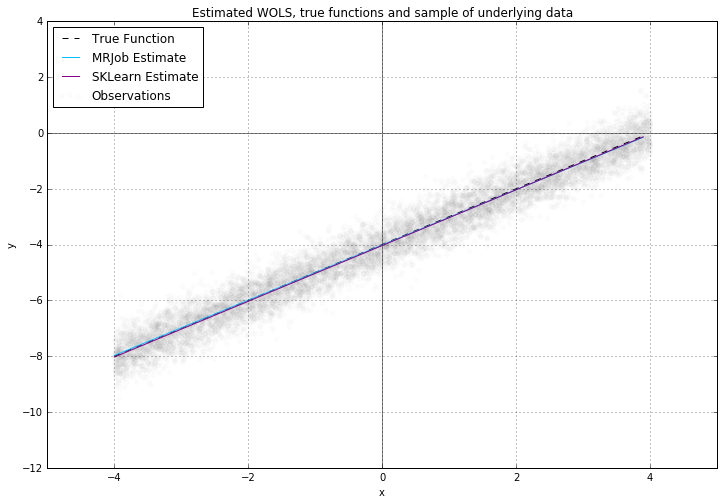

In [ ]:
def plot_65():
    xStep = np.arange(-4, 4, 0.1)
    y_True = -4 + xStep
    y_MRJob = mrjob_coefs[0] + mrjob_coefs[1] * xStep
    y_SKLearn = lr_coefs[0] + lr_coefs[1] * xStep

    plt.figure(figsize=(12,8))
    plt.grid(True)
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.scatter(x_sample, y_sample, marker='o', color='grey', alpha=0.02, label='Observations')
    trueFunction = plt.plot(xStep, y_True, color='black', ls='dashed', label='True Function')
    MRJobFunction = plt.plot(xStep, y_MRJob, color='deepskyblue', label='MRJob Estimate')
    SKLearnFunction = plt.plot(xStep, y_SKLearn, color='darkmagenta', label='SKLearn Estimate')
    plt.title('Estimated WOLS, true functions and sample of underlying data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='upper left')

plot_65()

> Comment on your findings.

Visually, all the estimates are very similar to each other (the lines are barely distinguishable). We see more of a difference when we look at the table of values where `scikit-learn` has a better estimate of the slope while the MapReduce implementation has a better estimate of the intercept term.

# HW 6.5.1 (Optional)

> Using MRJob and in Python, plot the error surface for the weighted linear regression model using a heatmap and contour plot. Also plot the current model in the original domain space.  (Plot them side by side if possible)

> Plot the path to convergence (during training) for the weighted linear regression model in plot error space and in the original domain space. Make sure to label your plots with iteration numbers, function, model space versus original domain space, etc.

> Comment on convergence and on the mean squared error using your weighted OLS algorithm on the weighted dataset versus using the weighted OLS algorithm on the uniformly weighted dataset.

# HW 6.6 Clean up notebook for GMM via EM

> Using the following notebook as a starting point:

> http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/0t7985e40fovlkw/EM-GMM-MapReduce%20Design%201.ipynb

> Improve this notebook as follows:
> - Add in equations into the notebook (not images of equations)
> - Number the equations
> - Make sure the equation notation matches the code and the code and comments refer to the equations numbers
> - Comment the code
> - Rename/Reorganize the code to make it more readable
> - Rerun the examples similar graphics (or possibly better graphics)

Standalone notebook located here: [MIDS-W261-2016-HWK-Week06-Seltzer_GMMviaEM.ipynb](http://nbviewer.jupyter.org/github/mseltz/W261-Fall2016/blob/master/Week06/MIDS-W261-2016-HWK-Week06-Seltzer_GMMviaEM.ipynb)

# HW 6.7 Implement Bernoulli Mixture Model via EM

## BMM Equation Review

Let $t_i$ denote the $i$-th term from our vocabulary consisting of $N$ terms. Let $\omega_k$ denote the set of documents that are members of the $k$-th cluster (or class) of documents, with there being $K$ total clusters in all. Let $\pi_k$ denote the prior probability that any given document is a member of $\omega_k$ (i.e., the current proportion of all documents that are in $\omega_k$).

Let $d$ denote a document, and let the vector $\mathbf{x}$ be a description of terms in $d$. Let $x_i = 1$ when $t_i \in d$, and $x_i = 0$ when $t_i \notin d$. Let $\mu_{ik} = P(x_i = 1 \mid \omega_k)$ be the probability that a document from cluster (or class) $\omega_k$ contains $t_i$.

Let $L(d \mid \omega_k; \theta)$ denote the likelihood that cluster $\omega_k$ generated document $d$. Let $P(d \mid \omega_k; \theta)$ denote the probability that cluster $\omega_k$ generated document $d$. If we combine this across all $K$ classes, we derive the following for the probability that $\omega_k$ generated document $d$:

$$
\begin{split}
P(d \mid \omega_k; \theta) = \frac{L(d \mid \omega_k; \theta)}{\sum_{i=1}^K L(d \mid \omega_i; \theta)}
\end{split}
$$

In a Bernoulli Mixture Model, the likelihood that $\omega_k$ generated document $d$ is defined using the Bernoulli probability density function:

$$L(d \mid \omega_k; \theta) = \pi_k \prod_{i=1}^N \mu_{ik}^{x_i} (1-\mu_{ik})^{1-x_{i}}$$

Since the number of terms in our vocabulary $N$ can be large, we use log-likelihoods to prevent underflow:

$$\log(L(d \mid \omega_k; \theta)) = \log(\pi_k) + \sum_{i=1}^N \big[ x_i \cdot \log(\mu_{ik}) + (1-x_i) \cdot \log(1-\mu_{ik})\big]$$

## BMM Implementation

> Implement the EM clustering algorithm to determine Bernoulli Mixture Model for discrete data in MRJob.

In [ ]:
import csv
import math
import sys

from mrjob.job import MRJob

class BernoulliMixtureModelJob(MRJob):

    """
    Load the smoothing factor.
    """
    def configure_options(self):
        super(BernoulliMixtureModelJob, self).configure_options()

        self.add_passthrough_option(
            '--smoothing-factor', type = 'float', default = 0.0001)

    """
    Load the Bernoulli Mixture Model from the previous iteration and initialize
    the class counts (for the priors) and the weighted feature tallies.
    """
    def mapper_init(self):
        self.load_model()

        self.total_examples = 0
        self.class_examples = []
        self.weighted_true = []
        self.weighted_false = []

        # There is a strange pass by reference issue in initializing 2D arrays
        # using the multiplication operator, so iterate and append 1D arrays.

        for i in range(self.class_count):
            self.class_examples.append(0.0)
            self.weighted_true.append([0.0] * self.feature_count)
            self.weighted_false.append([0.0] * self.feature_count)

    """
    Compute the probability for each class and update our internal tallies of
    how many true/false values on each feature for each class.
    """
    def mapper(self, _, line):
        features = [int(x) for x in csv.reader([line]).next()]

        # First, compute the log likelihood that the feature is in any given
        # feature class.

        log_likelihoods = self.get_log_likelihoods(features)

        # Identify the numerators by exponentiating all the values. Compute
        # the denominator by adding the numerators together.

        numerators = [math.exp(x) for x in log_likelihoods]
        denominator = sum(numerators)
        class_probabilities = [numerator / denominator for numerator in numerators]

        # Compute the class probabilities so that we can tally the weighted
        # feature occurrencies.

        self.total_examples += 1

        for i in range(self.class_count):
            class_probability = class_probabilities[i]
            self.class_examples[i] += class_probability

            for j in range(self.feature_count):
                if features[j]:
                    self.weighted_true[i][j] += class_probability
                else:
                    self.weighted_false[i][j] += class_probability

    """
    Emit the weighted probabilities.
    """
    def mapper_final(self):
        for i in range(self.class_count):
            emit_class_id = self.class_ids[i]

            class_summary = {
                'class_examples': self.class_examples[i],
                'total_examples': self.total_examples,
                'weighted_true': self.weighted_true[i],
                'weighted_false': self.weighted_false[i]
            }

            yield emit_class_id, class_summary

    """
    Load the Bernoulli Mixture Model from the previous iteration.
    """
    def reducer_init(self):
        self.load_model()

    """
    Combine the summaries for each class in order to compute the new priors and
    conditional probabilities / likelihoods.
    """
    def reducer(self, class_id, class_summaries):
        class_examples = 0
        total_examples = 0
        total_weighted_true = [0.0] * self.feature_count
        total_weighted_false = [0.0] * self.feature_count

        # Combine the counts and weighted counts.

        for class_summary in class_summaries:
            class_examples += class_summary['class_examples']
            total_examples += class_summary['total_examples']

            for i in range(self.feature_count):
                total_weighted_true[i] += class_summary['weighted_true'][i]
                total_weighted_false[i] += class_summary['weighted_false'][i]

        # Compute the priors and likelihoods

        class_prior = float(class_examples) / total_examples
        likelihoods = []

        for weighted_true, weighted_false in zip(total_weighted_true, total_weighted_false):
            weighted_total = (weighted_true + weighted_false)

            # Account for any smoothing

            weighted_true = weighted_true + self.options.smoothing_factor
            weighted_total += self.options.smoothing_factor * self.class_count

            likelihood = weighted_true / weighted_total
            likelihoods.append(likelihood)

        # Yield the priors concatenated to the likelihoods as the model for this class

        yield class_id, [class_prior] + likelihoods

    """
    Load the Bernoulli Mixture Model from the previous iteration.
    """
    def load_model(self):
        self.class_ids = []
        self.class_priors = []
        self.likelihoods = []

        # Initialize the class IDs, the priors, and the per-class likelihoods.

        with open('bmm_model.txt', 'r') as model_file:
            for row in csv.reader(model_file):
                class_id = row[0]
                class_prior = float(row[1])
                likelihoods = [float(x) for x in row[2:]]

                self.class_ids.append(class_id)
                self.class_priors.append(class_prior)
                self.likelihoods.append(likelihoods)

        # For convenience, set the class counts and feature counts.

        self.class_count = len(self.class_ids)
        self.feature_count = len(self.likelihoods[0])

        # The unit test has a situation where there are variables that have not
        # been initialized. Track that here.

        self.ignore = [True for i in range(self.feature_count)]

        for likelihood in self.likelihoods:
            for j in range(self.feature_count):
                if likelihood[j] != 0.0:
                    self.ignore[j] = False

    """
    Utility method to get the log likelihood for a single class.
    """
    def get_log_likelihood(self, class_prior, likelihoods, binarized_features):

        # If this cluster no longer has any members in it, assume that we can ignore
        # this class altogether for our computations.

        if class_prior == 0.0:
            return float('-inf')

        log_likelihood = math.log(class_prior)

        for j in range(self.feature_count):

            # Ignore features that we have never seen (as they do not affect our
            # belief / probability).

            if self.ignore[j]:
                continue

            # Take advantage of the fact that one of the things we're adding is zero.

            likelihood = likelihoods[j] if binarized_features[j] else 1 - likelihoods[j]

            # If the likelihood is somehow zero, assume that it's not possible to
            # be in the class and return -inf

            if likelihood <= 0.0:
                return float('-inf')

            log_likelihood += math.log(likelihood)

        # Finished computing the log likelihood, return it!

        return log_likelihood

    """
    Utility method to get all the likelihoods for all classes
    """
    def get_log_likelihoods(self, features):
        binarized_features = [bool(x) for x in features]

        log_likelihoods = []

        for class_prior, likelihoods in zip(self.class_priors, self.likelihoods):
            log_likelihood = self.get_log_likelihood(class_prior, likelihoods, binarized_features)
            log_likelihoods.append(log_likelihood)

        # If we wound up with a max likelihood of negative infinity, that means
        # everything is zero (so everything has the same probability).

        max_log_likelihood = max(log_likelihoods)

        if max_log_likelihood == float('-inf'):
            return [0 for i in range(len(log_likelihoods))]

        # Shift the log likelihoods to avoid getting an underflow when we
        # convert them to exponents. Note that everything is negative, so you
        # will want to subtract.

        shifted_log_likelihoods = [x - max_log_likelihood for x in log_likelihoods]

        return shifted_log_likelihoods

if __name__ == '__main__' and sys.argv[0].find('ipykernel') == -1:
    BernoulliMixtureModelJob().run()

# HW 6.7a Unit Test

> As a unit test use the dataset in the following slides:

> https://www.dropbox.com/s/maoj9jidxj1xf5l/MIDS-Live-Lecture-06-EM-Bernouilli-MM-Systems-Test.pdf?dl=0

## Create IR data set

In [ ]:
import numpy
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

documents = [
    "hot chocolate cocoa beans",
    "cocoa ghana africa",
    "beans harvest ghana",
    "cocoa butter",
    "butter truffles",
    "sweet chocolate",
    "sweet sugar",
    "sugar cane brazil",
    "sweet sugar beet",
    "sweet cake icing",
    "cake black frost"
]

data = vectorizer.fit_transform(documents)

with open('IR_input_data.csv', 'w') as output_file:
    for row in data.toarray():
        print >> output_file, ','.join([str(int(x)) for x in row])

## Cross-check against IR data set

> Cross-check that you get the same cluster assignments and cluster Bernouilli models as presented in the slides after 25 iterations. Don't forget the smoothing.

### Add single iteration

In [ ]:
import pandas

pandas.set_option('display.float_format', lambda x: '%.3f' % x)

"""
Utility function which runs once and stores the model to model.txt
"""
def run_iteration(input_file):

    # Clean up the original output folder and run the MRJob

    !rm -rf mrjob_67a_output
    !python BernoulliMixtureModelJob.py -r local \
        --strict-protocols \
        --file=bmm_model.txt \
        --output-dir=mrjob_67a_output \
        --no-output \
        $input_file \
        > /dev/null 2>&1

    # Convert the JSON output into a CSV using the UNIX tr command

    !cat mrjob_67a_output/* | tr '[' ',' | tr -d ']' | tr -d '"' | tr -d '\t' | tr -d ' ' > bmm_model.txt

"""
Utility function which returns the data frame corresponding to the model,
selecting only those columns which appear in the IR text.
"""
def check_ir_model():
    header_names = ['priors'] + vectorizer.get_feature_names()
    df = pandas.read_csv('bmm_model.txt', header = None, names = header_names)

    return df[['priors', 'africa', 'brazil', 'cocoa', 'sugar', 'sweet']]

### Cross-check first iteration

The first iteration is special in that it only has lines 6 and 7 from the input.

In [ ]:
!sed -n '6,7p' IR_input_data.csv | tee IR_input_data_iter1.csv

0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


We can use these values for the $\mu_{ik}$ used in the initial iterations of our initial model.

In [ ]:
%%writefile bmm_model.txt
Class1,0.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
Class2,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0

Overwriting bmm_model.txt


While this is not what the Information Retrieval text does, all the code is greatly simplified if the first iteration generates a new model with the smoothing factor applied.

In [ ]:
run_iteration('IR_input_data_iter1.csv')
print 'Iteration 1'
check_ir_model()

Iteration 1


,priors,africa,brazil,cocoa,sugar,sweet
Class1,0.500,0.000,0.000,0.000,0.000,1.000
Class2,0.500,0.000,0.000,0.000,1.000,1.000


### Cross check later iterations

In [ ]:
from IPython.display import display

for i in range(1, 25):
    run_iteration('IR_input_data.csv')

    if (i + 1) in [2, 3, 4, 5, 15, 25]:
        print 'Iteration', i + 1
        display(check_ir_model())

Iteration 2


,priors,africa,brazil,cocoa,sugar,sweet
Class1,0.455,0.100,0.000,0.400,0.000,0.300
Class2,0.545,0.083,0.167,0.167,0.500,0.417


Iteration 3


,priors,africa,brazil,cocoa,sugar,sweet
Class1,0.534,0.134,0.000,0.432,0.000,0.238
Class2,0.466,0.042,0.195,0.090,0.585,0.507


Iteration 4


,priors,africa,brazil,cocoa,sugar,sweet
Class1,0.574,0.158,0.000,0.465,0.000,0.180
Class2,0.426,0.001,0.213,0.014,0.640,0.610


Iteration 5


,priors,africa,brazil,cocoa,sugar,sweet
Class1,0.575,0.158,0.000,0.474,0.000,0.159
Class2,0.425,0.000,0.214,0.001,0.642,0.640


Iteration 15


,priors,africa,brazil,cocoa,sugar,sweet
Class1,0.537,0.169,0.000,0.508,0.000,0.153
Class2,0.463,0.000,0.196,0.000,0.589,0.608


Iteration 25


,priors,africa,brazil,cocoa,sugar,sweet
Class1,0.455,0.200,0.000,0.600,0.000,0.000
Class2,0.545,0.000,0.167,0.000,0.500,0.667


Move the model so that it does not get mistaken in future iterations.

In [ ]:
!mv bmm_model.txt ir_model.txt

# HW 6.7b Tweet Dataset

> As a test: use the same dataset from HW 4.5, the Tweet Dataset.
Using this data, you will implement a 1000-dimensional EM-based Bernoulli Mixture Model  algorithm in MrJob on the users by their 1000-dimensional word stripes/vectors using K = 4.

## Create HW6.7b driver

In [ ]:
import sys
import numpy

from ConvergingModelDriver import ConvergingModelDriver
from BernoulliMixtureModelJob import BernoulliMixtureModelJob

class BernoulliMixtureModelDriver(ConvergingModelDriver):

    def __init__(self, input_file, k):
        ConvergingModelDriver.__init__(self, 'bmm_model.txt', input_file)

        self.k = k

    """
    For reproducibility, we'll start at everything evenly spaced at values
    that are not too extreme (between 1/4 and 3/4)
    """
    def get_initial_model(self):
        self.class_ids = ['Cluster' + str(i + 1) for i in range(self.k)]

        string_format = '{:10s}' + ''.join(['{:>10s}' for i in range(self.k)])
        string_values = ['Iteration'] + self.class_ids

        print string_format.format(*string_values)
        print '-' * (10 * (self.k + 1))

        initial_model = {}
        priors = [1.0 / self.k] * self.k

        for class_id, prior in zip(self.class_ids, priors):
            initial_model[class_id] = [prior]
            initial_model[class_id].extend(numpy.random.random(1000))

        return initial_model

    """
    Return the job with a smoothing factor argument.
    """
    def get_job(self, iteration_args):
        smoothing_factor = 0.0001

        extra_args = ['--smoothing-factor=' + str(smoothing_factor)]
        job_args = iteration_args + extra_args

        return BernoulliMixtureModelJob(args = job_args)

    """
    Logs the model.
    """
    def log_iteration(self, iteration, model, maximum_change):
        class_priors = [model[class_id][0] for class_id in self.class_ids]

        string_format = '{:10d}' + ''.join(['{:>10.4f}' for i in range(self.k)])
        string_values = [iteration] + class_priors

        print string_format.format(*string_values)

if __name__ == '__main__' and sys.argv[0].find('ipykernel') == -1:
    driver = BernoulliMixtureModelDriver(sys.argv[2], int(4))
    driver.run(sys.argv[1], sys.argv[3], float(sys.argv[4]))

## Download HW4.5 data

In [ ]:
import os

if not os.path.isfile('topUsers_features.txt'):
    !wget --quiet https://www.dropbox.com/sh/5bex8l871t0bg3a/AAChDHmBbudx6E807bx5f_m0a/topUsers_Apr-Jul_2014_1000-words.txt
    !cut -d',' -f 4- topUsers_Apr-Jul_2014_1000-words.txt > topUsers_features.txt

## Run HW6.7b job

In [ ]:
!python BernoulliMixtureModelDriver.py local topUsers_features.txt mrjob_65b_output 0.001 2> /dev/null

Iteration   Cluster1  Cluster2  Cluster3  Cluster4
--------------------------------------------------
         0    0.2500    0.2500    0.2500    0.2500
         1    0.1023    0.0174    0.8633    0.0170
         2    0.0413    0.0687    0.8770    0.0130
         3    0.0380    0.0740    0.8760    0.0120
         4    0.0390    0.0750    0.8740    0.0120
         5    0.0409    0.0750    0.8721    0.0120
         6    0.0400    0.0760    0.8720    0.0120
         7    0.0406    0.0760    0.8714    0.0120
         8    0.0420    0.0760    0.8700    0.0120
         9    0.0442    0.0760    0.8678    0.0120
        10    0.0450    0.0760    0.8670    0.0120
        11    0.0330    0.0880    0.8670    0.0120
        12    0.0431    0.0910    0.8539    0.0120
        13    0.0666    0.0910    0.8304    0.0120
        14    0.0870    0.0910    0.8100    0.0120
        15    0.0961    0.0910    0.8009    0.0120
        16    0.1022    0.0910    0.7948    0.0120
        17    0.1064    0.0910 

## Check against class counts

The class identifier is stored in the second column. If we use `sort` and `uniq -c`, we can get the number of occurrences of each class.

In [ ]:
!cut -d',' -f 2 topUsers_Apr-Jul_2014_1000-words.txt > topUsers_true_classes.txt
!sort topUsers_true_classes.txt | uniq -c

    752 0
     91 1
     54 2
    103 3


# HW 6.7c Check vs. K-Means

## Load true classes for comparison

In [ ]:
import numpy

Xfreq = numpy.loadtxt('topUsers_features.txt', delimiter = ',')
Y = numpy.loadtxt('topUsers_true_classes.txt')

## Retrieve centroids from HW4.5

> Repeat this experiment using your KMeans MRJob implementation from HW4.

Rather than re-running the jobs, we still have the output from HW4!

In [ ]:
!wget --quiet https://raw.githubusercontent.com/mseltz/W261-Fall2016/master/Week04/Centroids.txt

## Identify the clusters for k-means

In [ ]:
import numpy

# Use the centroids generated in HW4 KMeans as one benchmark
# Remember that this KMeans was done on the frequency counts, not the binarized data

# Calculate find the nearest centroid for data point
def MinDist(datapoint, centroid_points):
    datapoint = numpy.array(datapoint)
    centroid_points = numpy.array(centroid_points)
    diff = datapoint - centroid_points
    diffsq = diff*diff
    # Get the nearest centroid for each instance
    minidx = numpy.argmin(list(diffsq.sum(axis = 1)))
    return minidx

with open('Centroids.txt', 'r') as model_file:
    centroids_KMeans = [map(float, line.split(',')) for line in model_file]

Y_KMeans = [int(MinDist(x,centroids_KMeans)) for x in Xfreq]

## Identify the clusters for BMM

In [ ]:
from BernoulliMixtureModelJob import BernoulliMixtureModelJob

bmm_job = BernoulliMixtureModelJob()
bmm_job.load_model()

# Go through all the weights and pick out the index of the max probability
# If there is a tie, go with the class that occurs the most frequently

Y_BMM = [numpy.argmax(bmm_job.get_log_likelihoods(x)) for x in Xfreq]

## Compare using rand score

> Report the rand index score using the class code as ground truth label for both algorithms and comment on your findings.

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

print "Comparing Y (truth) to BMM:   ", adjusted_rand_score(Y, Y_BMM)
print "Comparing Y (truth) to KMeans:", adjusted_rand_score(Y, Y_KMeans)

Comparing Y (truth) to BMM:    0.6815226747
Comparing Y (truth) to KMeans: 0.705458214192


In this case, the KMeans algorithm (using trained centroid initialization) has a larger Rand index than the Bernoulli Mixture Model via EM. This is expected, since we are "cheating" in a way by using the true classes to initialize the centroids in the KMeans algorithm. Both algorithms are heavily dependent on the initialization methods used, so the Rand index of the BMM may fluctuate greatly depending on the starting centroids used.